In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from model import ResNet20
from Train import model_training
from quantization_encoder import Quant
from quantization_decoding import Quant_decode

In [5]:
# Hyper parameters
epoch_losses = []
train_loss_list = []
epochs = 50
lr = 0.001
batch_size = 64

# Model device assignment
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ResNet20().to(device)

In [6]:
# Define transformation
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465),
                            (0.2023, 0.1994, 0.2010))])

# Load the training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# Load the test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Define the class names for reference
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [7]:
"""
# Training model on Cifar10
train_module = model_training(model, lr, trainloader, epochs)
train_loss = train_module.forward(device)
"""

'\n# Training model on Cifar10\ntrain_module = model_training(model, lr, trainloader, epochs)\ntrain_loss = train_module.forward(device)\n'

In [8]:
# Visualization of training results 
plt.plot(train_loss, linewidth=2, c='r')
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss of ResNet20 Model")
plt.grid(True)

plt.tight_layout()
plt.show()

NameError: name 'train_loss' is not defined

In [ ]:
model.eval()
with torch.no_grad():
    number_correct = 0
    samples = 0
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, prediction = torch.max(outputs, 1)
        samples += labels.size(0)
        number_correct += (prediction == labels).sum().item()

accuracy = (number_correct / samples) * 100.0
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
"""
torch.save(model.state_dict(), 'ResNet20_model.pth')
print("Model saved as 'ResNet20_model.pth'")
"""

In [ ]:
# Load model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_state_dict = torch.load('ResNet20_model.pth', map_location=device)

# Get all parameters
params = list(model_state_dict.items())
n_params = len(params)

NameError: name 'torch' is not defined

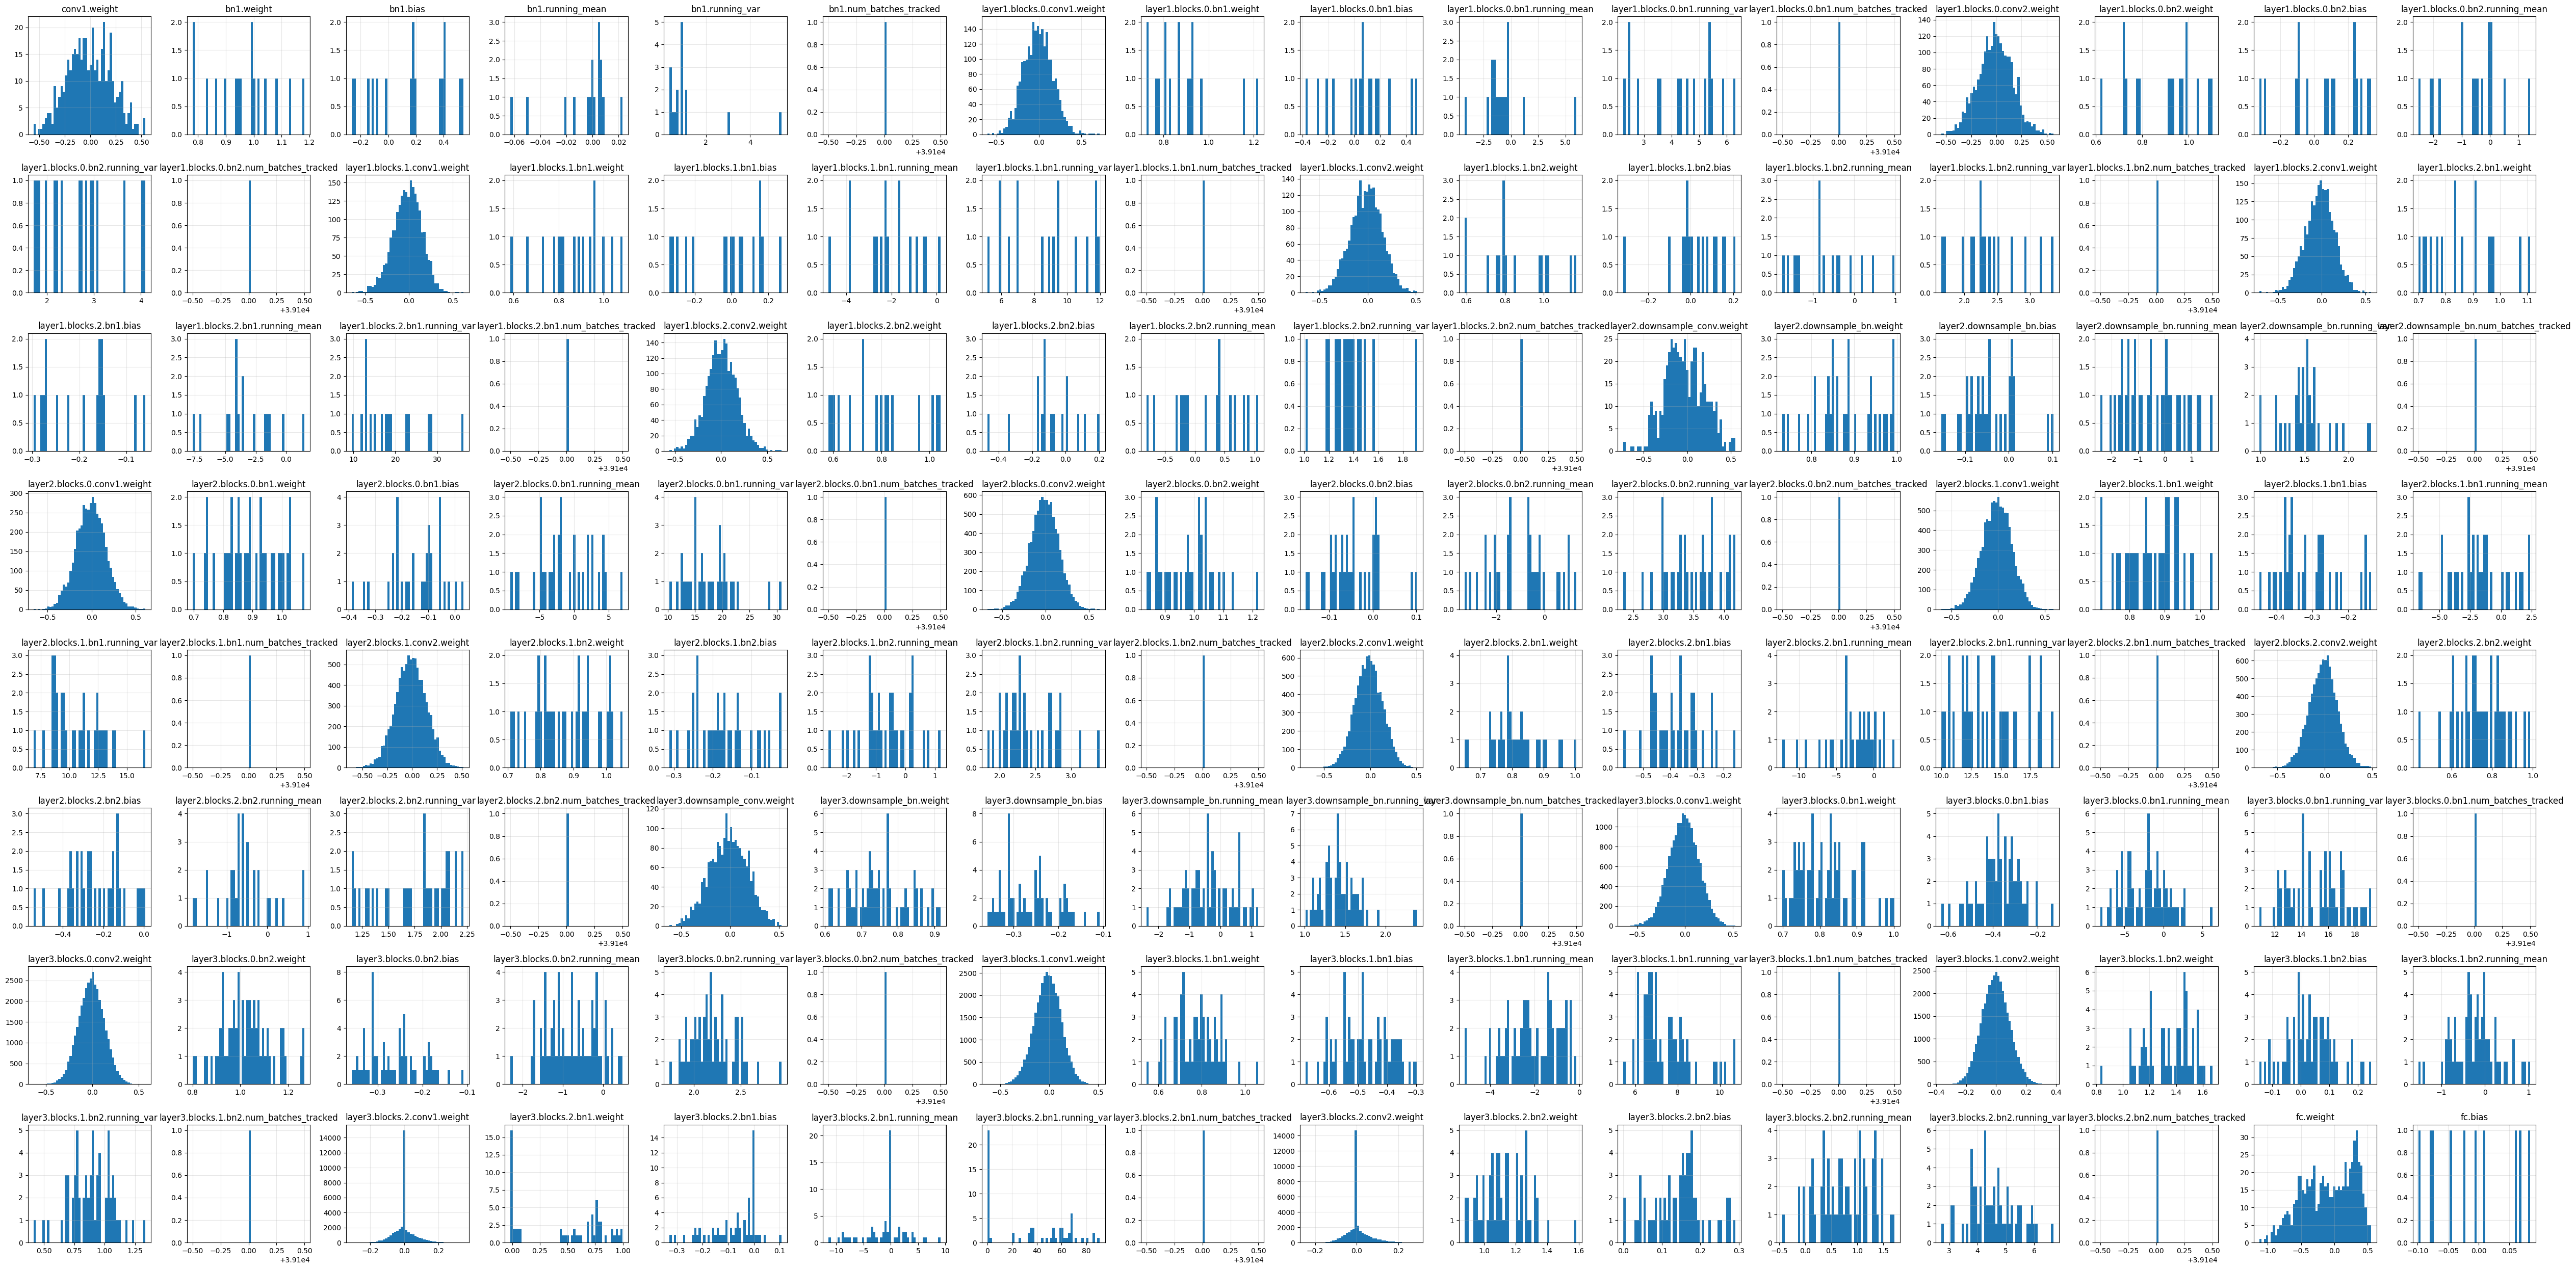

In [ ]:
n_cols = 16  # 16 columns
n_rows = (n_params + n_cols - 1) // n_cols  # 8 rows for 128 params

# Create subplots with larger figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(50, 25))
axes = axes.flatten()

# Plot each parameter
for i, (name, tensor) in enumerate(params):
    values = tensor.cpu().numpy().flatten()
    axes[i].hist(values, bins=50)
    axes[i].set_title(name)
    axes[i].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

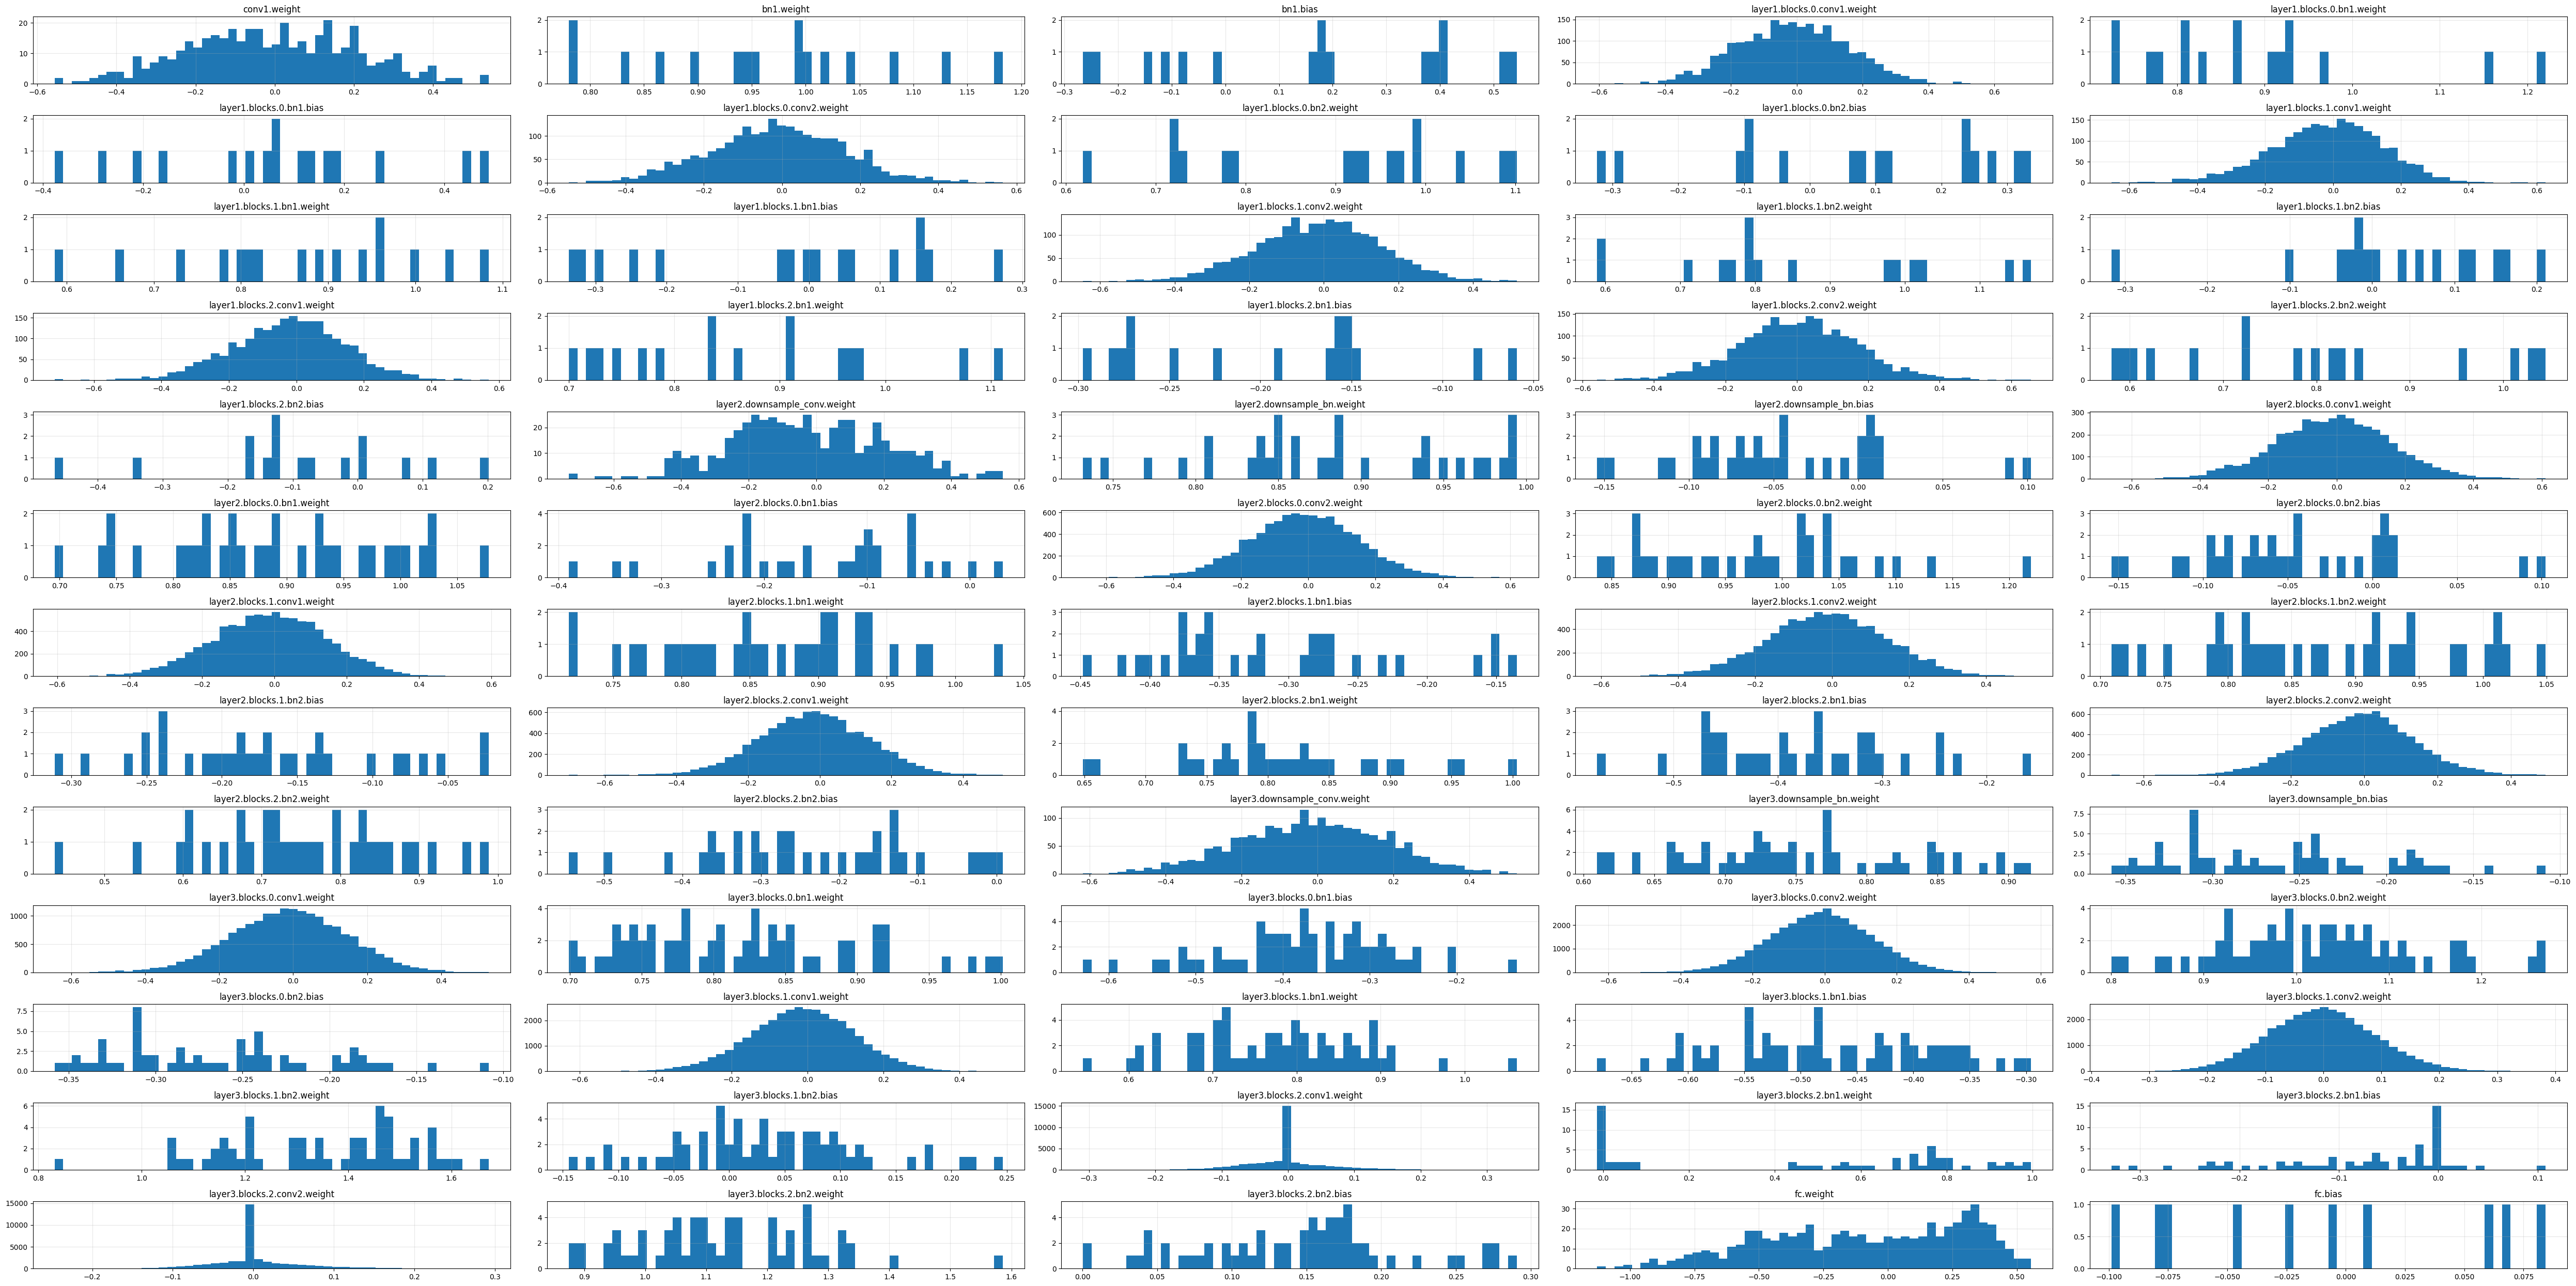

In [ ]:
filtered_params = []
for name, tensor in params:
    # Include if name contains: weight, bias, running_mean, running_var, num_batches_tracked
    if any(keyword in name.lower() for keyword in ['weight', 'bias']):
        filtered_params.append((name, tensor))

params = filtered_params
n_params = len(params)

n_cols = 5  # 5 columns
n_rows = (n_params + n_cols - 1) // n_cols  # 13 rows for 65 params

# Create subplots with larger figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(50, 25))
axes = axes.flatten()

# Plot each parameter
for i, (name, tensor) in enumerate(params):
    values = tensor.cpu().numpy().flatten()
    axes[i].hist(values, bins=50)
    axes[i].set_title(name)
    axes[i].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
# Quantization of weight tensors
tensor_array = []
for i, (name, weight_tensor) in enumerate(params):
  quantized_tensor, scale = Quant(weight_tensor, bits=8) # 8 bit quantization
  fp32_tensor, error = Quant_decode(scale, quantized_tensor, weight_tensor)
  tensor_array.append([quantized_tensor, fp32_tensor, weight_tensor])

print(f"Quantization Error: {error:.2f}")

NameError: name 'params' is not defined